In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import matplotlib as mpl
mpl.rc("font", family="Malgun Gothic")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_path = "dataset/"
data_list = sorted(glob(os.path.join(data_path, "*.csv")))

In [3]:
data_list

['dataset\\01_Contract_Data.csv',
 'dataset\\02_VIP_member_Data.csv',
 'dataset\\03_Delivery.csv',
 'dataset\\04_store_member.csv',
 'dataset\\04_store_product_1.csv',
 'dataset\\2016_health_checkup_1.csv',
 'dataset\\2016_health_checkup_2.csv',
 'dataset\\2016_health_checkup_3.csv',
 'dataset\\2016_health_checkup_4.csv',
 'dataset\\store_member.csv',
 'dataset\\store_product_1.csv',
 'dataset\\store_product_2.csv',
 'dataset\\store_product_3.csv',
 'dataset\\store_product_4.csv']

In [4]:
data_list[-5]

'dataset\\store_member.csv'

In [5]:
store_data_list = data_list[-4:]

In [6]:
store_data_list

['dataset\\store_product_1.csv',
 'dataset\\store_product_2.csv',
 'dataset\\store_product_3.csv',
 'dataset\\store_product_4.csv']

In [7]:
df1 = pd.read_csv(data_list[-5])

In [8]:
df1

,회원번호,회원상태,성별,결혼유무,주소,생년
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967.00
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.00
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.00
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.00
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.00
...,...,...,...,...,...,...
4391,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,1963.00
4392,6493,정상회원,여,기혼,서울 관악구 행운동 1681,1982.00
4393,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,1975.00
4394,6495,정상회원,여,기혼,서울 용산구 한남동 737-,1961.00


In [9]:
df2 = pd.DataFrame()
for store_data in store_data_list:
    df_ = pd.read_csv(store_data)
    df2 = pd.concat([df2, df_], axis=0, ignore_index=True)

In [10]:
df2

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호
0,20170201,50301001.00,채소,과일채소,딸기,딸기(1kg),1.00,13600.00,매장1,NaN,2102.00
1,20170201,80201053.00,간식,떡,가래떡,현미가래떡(400g),1.00,99999999.00,매장1,NaN,2102.00
2,20170201,110104033.00,음료,음료,음료기타,개복숭아감식초(700ml),1.00,13000.00,매장1,NaN,2103.00
3,20170201,40203001.00,과실,견과,잣,잣(220g:1병),1.00,14800.00,매장1,NaN,2105.00
4,20170201,50417002.00,채소,뿌리채소,우엉,우엉(300g),1.00,3400.00,매장1,NaN,2105.00
...,...,...,...,...,...,...,...,...,...,...,...
735778,20170630,50406001.00,채소,뿌리채소,당근,당근(1kg),1.00,3500.00,매장4,NaN,2791.00
735779,20170630,50508005.00,채소,양념채소,양파,양파(2kg),1.00,3800.00,매장4,NaN,2791.00
735780,20170630,70203053.00,수산,냉동수산,냉동생선,대구순살(100g),1.00,7100.00,매장4,NaN,2791.00
735781,20170630,100201003.00,반찬,두부/유부,두부,두부(1모:420g),1.00,2000.00,매장4,NaN,2791.00


In [11]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
공급일자,735783.00,20170371.33,171.53,20170102.00,20170217.00,20170403.00,20170519.00,20170630.00
물품코드,735778.00,70849907.24,25240499.72,10101018.00,50508005.00,60601046.00,90103063.00,160101271.00
구매수량,735783.00,164.25,117740.28,-120.00,1.00,1.00,1.00,99999999.00
구매금액,735779.00,5826.37,117462.25,-360000.00,2150.00,3800.00,6500.00,99999999.00
반품_원거래일자,10337.00,20170312.35,786.00,20161213.00,20170215.00,20170406.00,20170524.00,20170630.00
회원번호,735761.00,3091.30,958.02,2101.00,2391.00,2755.00,3492.00,6496.00


In [12]:
## 구매금액
cond1 = (df2["구매금액"] > 1449000.00)
df2["구매금액(clean)"] = df2["구매금액"]
df2.loc[cond1, "구매금액(clean)"] = np.nan

In [13]:
## 구매수량
cond1 = (df2["구매수량"] > 120.00)
df2["구매수량(clean)"] = df2["구매수량"]
df2.loc[cond1, "구매수량(clean)"] = np.nan

In [14]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
공급일자,735783.00,20170371.33,171.53,20170102.00,20170217.00,20170403.00,20170519.00,20170630.00
물품코드,735778.00,70849907.24,25240499.72,10101018.00,50508005.00,60601046.00,90103063.00,160101271.00
구매수량,735783.00,164.25,117740.28,-120.00,1.00,1.00,1.00,99999999.00
구매금액,735779.00,5826.37,117462.25,-360000.00,2150.00,3800.00,6500.00,99999999.00
반품_원거래일자,10337.00,20170312.35,786.00,20161213.00,20170215.00,20170406.00,20170524.00,20170630.00
회원번호,735761.00,3091.30,958.02,2101.00,2391.00,2755.00,3492.00,6496.00
구매금액(clean),735777.00,5677.01,8650.82,-360000.00,2150.00,3800.00,6500.00,1449000.00
구매수량(clean),735780.00,1.15,0.76,-120.00,1.00,1.00,1.00,120.00


In [15]:
df2["공급일자(dt)"] = pd.to_datetime(df2["공급일자"], format="%Y%m%d")
df2["연도"] = df2["공급일자(dt)"].dt.year
df2["월"] = df2["공급일자(dt)"].dt.month
df2["주차(workweek)"] = df2["공급일자(dt)"].dt.isocalendar().week
df2["요일"] = df2["공급일자(dt)"].dt.day_name()

In [16]:
df2.columns

Index(['공급일자', '물품코드', '물품대분류', '물품중분류', '물품소분류', '물품명', '구매수량', '구매금액',
       '구매매장', '반품_원거래일자', '회원번호', '구매금액(clean)', '구매수량(clean)', '공급일자(dt)',
       '연도', '월', '주차(workweek)', '요일'],
      dtype='object')

In [17]:
## 17년도만 
df2.pivot_table(index="연도", values=["구매금액(clean)", "구매수량(clean)"], aggfunc="sum")

,구매금액(clean),구매수량(clean)
연도,,
2017,4177017038.00,849082.20


In [18]:
## 17년도 1-6월만
df2.pivot_table(index=["연도", "월"], values=["구매금액(clean)", "구매수량(clean)"], aggfunc="sum")

구매금액(clean)  구매수량(clean)
연도   월                          
2017 1 746511945.00    137834.73
     2 626351451.00    125945.90
     3 731169409.00    148444.85
     4 681583060.00    140345.42
     5 676168421.00    143463.00
     6 715232752.00    153048.30

<Axes: xlabel='공급일자(dt)', ylabel='구매금액(clean)'>

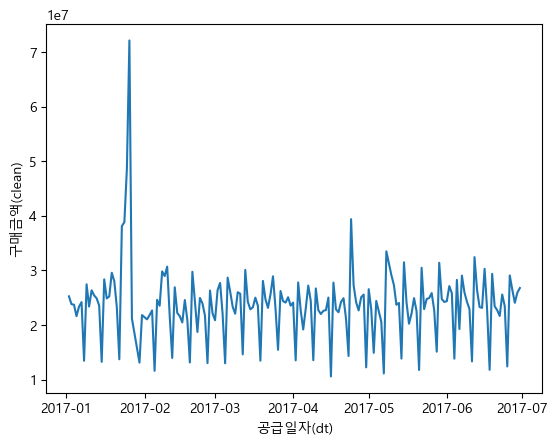

In [19]:
## 전체 매장 공급일자(dt)에 따른 매출액의 추이 
sns.lineplot(data=df2, x="공급일자(dt)", y="구매금액(clean)",
            estimator="sum", errorbar=None)
# peak1: 1-2월 사이 upward
# peak2: 주기적 downward

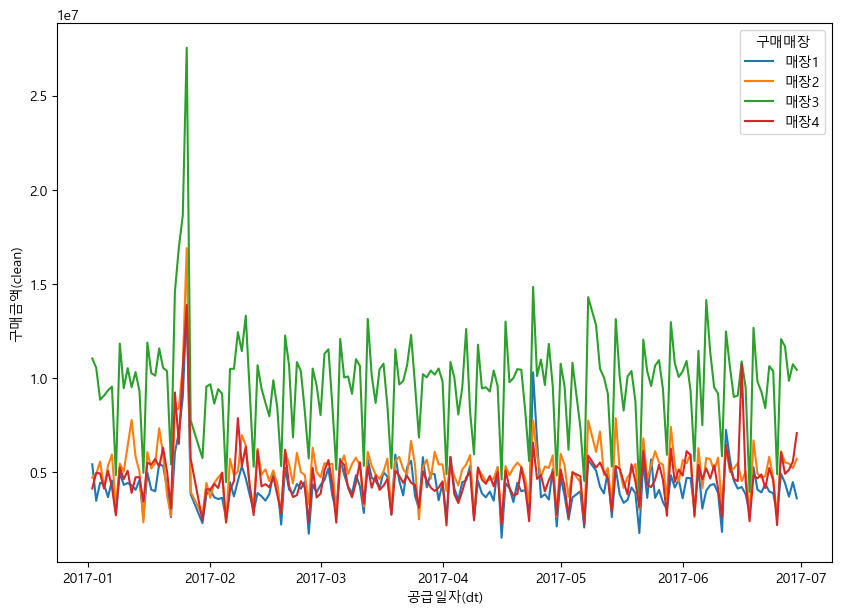

In [20]:
## 매장별 공급일자(dt)에 따른 매출액의 추이
plt.figure(figsize=(10, 7))
sns.lineplot(data=df2, x="공급일자(dt)", y="구매금액(clean)",
            hue='구매매장', estimator="sum", errorbar=None)
plt.savefig("매장별 매출 추이.jpg")

In [21]:
df2["요일"].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

<Axes: xlabel='요일', ylabel='구매금액(clean)'>

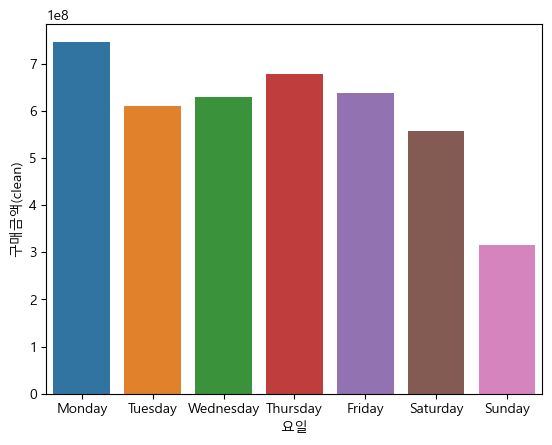

In [22]:
## 전체 매장 요일별 매출액 비교: 월요일 가장 높다, 일요일 가장 낮다. 
sns.barplot(data=df2, x="요일", y="구매금액(clean)",
           order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
            estimator="sum", errorbar=None)

<Axes: xlabel='요일', ylabel='구매금액(clean)'>

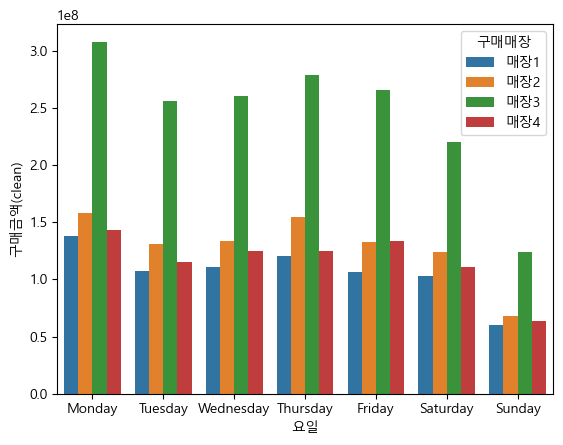

In [23]:
## 매장별 요일에 따른 매출액 비교: 
sns.barplot(data=df2, x="요일", y="구매금액(clean)", hue="구매매장",
           order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
            estimator="sum", errorbar=None)

In [24]:
## 회원별 구매액, 구매수량의 총합
df2_1 = df2.pivot_table(index="회원번호",
                        values=["구매금액(clean)", "구매수량(clean)"],
                        aggfunc="sum").reset_index()

In [25]:
df1_total = pd.merge(df1, df2_1, on="회원번호", how="inner")

In [26]:
df1_total

,회원번호,회원상태,성별,결혼유무,주소,생년,구매금액(clean),구매수량(clean)
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967.00,1991230.00,381.00
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.00,2093160.00,472.50
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.00,8273550.00,1675.40
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.00,6289495.00,1401.80
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.00,3067930.00,602.00
...,...,...,...,...,...,...,...,...
4280,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,1963.00,51550.00,10.00
4281,6493,정상회원,여,기혼,서울 관악구 행운동 1681,1982.00,22500.00,3.00
4282,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,1975.00,18500.00,3.00
4283,6495,정상회원,여,기혼,서울 용산구 한남동 737-,1961.00,5300.00,1.00


In [27]:
## 회원별 방문횟수
df2_2 = df2.pivot_table(index=["회원번호", "공급일자(dt)"],
                      values="구매수량(clean)",
                      aggfunc="sum").reset_index()

df2_2["총방문횟수"] = 1

df2_3 = df2_2.pivot_table(index="회원번호", values="총방문횟수",
                  aggfunc="sum").reset_index()

In [28]:
df2_3

,회원번호,총방문횟수
0,2101.00,86
1,2102.00,79
2,2103.00,126
3,2104.00,125
4,2105.00,57
...,...,...
4280,6492.00,1
4281,6493.00,1
4282,6494.00,1
4283,6495.00,1


In [29]:
df1_total_1 = pd.merge(df1_total, df2_3, on="회원번호", how="inner")

In [30]:
# df1_total + 총방문횟수
df1_total_1

,회원번호,회원상태,성별,결혼유무,주소,생년,구매금액(clean),구매수량(clean),총방문횟수
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967.00,1991230.00,381.00,86
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.00,2093160.00,472.50,79
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.00,8273550.00,1675.40,126
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.00,6289495.00,1401.80,125
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.00,3067930.00,602.00,57
...,...,...,...,...,...,...,...,...,...
4280,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,1963.00,51550.00,10.00,1
4281,6493,정상회원,여,기혼,서울 관악구 행운동 1681,1982.00,22500.00,3.00,1
4282,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,1975.00,18500.00,3.00,1
4283,6495,정상회원,여,기혼,서울 용산구 한남동 737-,1961.00,5300.00,1.00,1


In [31]:
df2["물품대분류"].value_counts()

채소       193170
축산물      134486
간식       111411
반찬        89534
수산        52608
양념/가루     35086
음료        30935
생활용품      27520
과실        21324
서류        12596
주곡        10324
잡곡         8922
건강         6894
주류          904
기타           64
베이커리          3
급식용           2
Name: 물품대분류, dtype: int64

In [32]:
# 전체 고객 물품대분류별 구매수량의 합
df2_4 = df2.pivot_table(index="회원번호", columns="물품대분류", values="구매수량(clean)",
               aggfunc="sum", fill_value=0, margins=True).reset_index()

In [33]:
# 고객별 전체 구매수량
df2_4["All"]

0         381.00
1         472.50
2        1675.40
3        1401.80
4         602.00
          ...   
4281        3.00
4282        3.00
4283        1.00
4284        8.00
4285   849059.10
Name: All, Length: 4286, dtype: float64

In [34]:
# 고객별 구물품대분류별 전체 구매수량 대비 비율
df2_4["간식(%)"] = df2_4["간식"] / df2_4["All"]
df2_4["건강(%)"] = df2_4["건강"] / df2_4["All"]
df2_4["과실(%)"] = df2_4["과실"] / df2_4["All"]
df2_4["생활용품(%)"] = df2_4["생활용품"] / df2_4["All"]
df2_4["서류(%)"] = df2_4["서류"] / df2_4["All"]
df2_4["수산(%)"] = df2_4["수산"] / df2_4["All"]
df2_4["양념/가루(%)"] = df2_4["양념/가루"] / df2_4["All"]
df2_4["음료(%)"] = df2_4["음료"] / df2_4["All"]
df2_4["잡곡(%)"] = df2_4["잡곡"] / df2_4["All"]
df2_4["주곡(%)"] = df2_4["주곡"] / df2_4["All"]
df2_4["주류(%)"] = df2_4["주류"] / df2_4["All"]
df2_4["채소(%)"] = df2_4["채소"] / df2_4["All"]
df2_4["축산물(%)"] = df2_4["축산물"] / df2_4["All"]

In [35]:
df2_4

물품대분류,회원번호,간식,건강,과실,급식용,기타,반찬,베이커리,생활용품,서류,...,생활용품(%),서류(%),수산(%),양념/가루(%),음료(%),잡곡(%),주곡(%),주류(%),채소(%),축산물(%)
0,2101.00,30.00,18.00,3.00,0,0,67,0,8.00,6.00,...,0.02,0.02,0.01,0.04,0.03,0.01,0.01,0.00,0.31,0.25
1,2102.00,149.00,0.00,29.50,0,0,56,0,3.00,11.00,...,0.01,0.02,0.05,0.04,0.01,0.01,0.03,0.00,0.22,0.11
2,2103.00,283.70,17.70,47.00,0,0,213,0,59.00,21.00,...,0.04,0.01,0.09,0.04,0.04,0.01,0.01,0.00,0.28,0.15
3,2104.00,232.00,3.20,54.00,0,0,200,0,26.00,17.00,...,0.02,0.01,0.08,0.04,0.03,0.01,0.01,0.00,0.29,0.15
4,2105.00,89.00,12.00,31.00,0,0,76,0,9.00,15.00,...,0.01,0.02,0.05,0.04,0.06,0.02,0.01,0.00,0.27,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4281,6493.00,0.00,0.00,0.00,0,0,0,0,0.00,0.00,...,0.00,0.00,0.00,0.67,0.00,0.00,0.00,0.00,0.00,0.33
4282,6494.00,0.00,0.00,0.00,0,0,3,0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4283,6495.00,0.00,0.00,1.00,0,0,0,0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4284,6496.00,1.00,0.00,0.00,0,0,0,0,2.00,0.00,...,0.25,0.00,0.12,0.00,0.25,0.00,0.00,0.00,0.12,0.12


In [36]:
df2_4.columns

Index(['회원번호', '간식', '건강', '과실', '급식용', '기타', '반찬', '베이커리', '생활용품', '서류', '수산',
       '양념/가루', '음료', '잡곡', '주곡', '주류', '채소', '축산물', 'All', '간식(%)', '건강(%)',
       '과실(%)', '생활용품(%)', '서류(%)', '수산(%)', '양념/가루(%)', '음료(%)', '잡곡(%)',
       '주곡(%)', '주류(%)', '채소(%)', '축산물(%)'],
      dtype='object', name='물품대분류')

In [40]:
df2_5 = df2_4[['회원번호', '양념/가루', '음료', '잡곡', '주곡', '주류', '채소', '축산물', 'All', '간식(%)', '건강(%)',
       '과실(%)', '생활용품(%)', '서류(%)', '수산(%)', '양념/가루(%)', '음료(%)', '잡곡(%)',
       '주곡(%)', '주류(%)', '채소(%)', '축산물(%)']].iloc[:-1]

df2_5["회원번호"] = df2_5["회원번호"].astype(int)
df2_5

물품대분류,회원번호,양념/가루,음료,잡곡,주곡,주류,채소,축산물,All,간식(%),...,생활용품(%),서류(%),수산(%),양념/가루(%),음료(%),잡곡(%),주곡(%),주류(%),채소(%),축산물(%)
0,2101,15.00,10.00,5.00,2.00,0.00,118.00,95.00,381.00,0.08,...,0.02,0.02,0.01,0.04,0.03,0.01,0.01,0.00,0.31,0.25
1,2102,17.00,7.00,5.00,16.00,0.00,104.00,51.00,472.50,0.32,...,0.01,0.02,0.05,0.04,0.01,0.01,0.03,0.00,0.22,0.11
2,2103,62.00,69.00,14.00,12.00,3.00,469.00,247.00,1675.40,0.17,...,0.04,0.01,0.09,0.04,0.04,0.01,0.01,0.00,0.28,0.15
3,2104,59.00,35.60,13.00,16.00,1.00,409.00,217.00,1401.80,0.17,...,0.02,0.01,0.08,0.04,0.03,0.01,0.01,0.00,0.29,0.15
4,2105,25.00,35.00,14.00,6.00,0.00,164.00,97.00,602.00,0.15,...,0.01,0.02,0.05,0.04,0.06,0.02,0.01,0.00,0.27,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280,6492,0.00,0.00,0.00,0.00,0.00,1.00,0.00,10.00,0.00,...,0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.00
4281,6493,2.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,0.00,...,0.00,0.00,0.00,0.67,0.00,0.00,0.00,0.00,0.00,0.33
4282,6494,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4283,6495,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [42]:
df_total = pd.merge(df1_total_1, df2_5, on="회원번호", how="inner")

In [43]:
df_total

,회원번호,회원상태,성별,결혼유무,주소,생년,구매금액(clean),구매수량(clean),총방문횟수,양념/가루,...,생활용품(%),서류(%),수산(%),양념/가루(%),음료(%),잡곡(%),주곡(%),주류(%),채소(%),축산물(%)
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967.00,1991230.00,381.00,86,15.00,...,0.02,0.02,0.01,0.04,0.03,0.01,0.01,0.00,0.31,0.25
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.00,2093160.00,472.50,79,17.00,...,0.01,0.02,0.05,0.04,0.01,0.01,0.03,0.00,0.22,0.11
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.00,8273550.00,1675.40,126,62.00,...,0.04,0.01,0.09,0.04,0.04,0.01,0.01,0.00,0.28,0.15
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.00,6289495.00,1401.80,125,59.00,...,0.02,0.01,0.08,0.04,0.03,0.01,0.01,0.00,0.29,0.15
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.00,3067930.00,602.00,57,25.00,...,0.01,0.02,0.05,0.04,0.06,0.02,0.01,0.00,0.27,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,1963.00,51550.00,10.00,1,0.00,...,0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.00
4281,6493,정상회원,여,기혼,서울 관악구 행운동 1681,1982.00,22500.00,3.00,1,2.00,...,0.00,0.00,0.00,0.67,0.00,0.00,0.00,0.00,0.00,0.33
4282,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,1975.00,18500.00,3.00,1,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4283,6495,정상회원,여,기혼,서울 용산구 한남동 737-,1961.00,5300.00,1.00,1,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [44]:
df_total["1회방문시평균구매금액"] = df_total["구매금액(clean)"] / df_total["총방문횟수"]

In [45]:
df_total.head()

,회원번호,회원상태,성별,결혼유무,주소,생년,구매금액(clean),구매수량(clean),총방문횟수,양념/가루,...,서류(%),수산(%),양념/가루(%),음료(%),잡곡(%),주곡(%),주류(%),채소(%),축산물(%),1회방문시평균구매금액
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967.00,1991230.00,381.00,86,15.00,...,0.02,0.01,0.04,0.03,0.01,0.01,0.00,0.31,0.25,23153.84
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.00,2093160.00,472.50,79,17.00,...,0.02,0.05,0.04,0.01,0.01,0.03,0.00,0.22,0.11,26495.70
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.00,8273550.00,1675.40,126,62.00,...,0.01,0.09,0.04,0.04,0.01,0.01,0.00,0.28,0.15,65663.10
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.00,6289495.00,1401.80,125,59.00,...,0.01,0.08,0.04,0.03,0.01,0.01,0.00,0.29,0.15,50315.96
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.00,3067930.00,602.00,57,25.00,...,0.02,0.05,0.04,0.06,0.02,0.01,0.00,0.27,0.16,53823.33


Mission
1. 처리한 데이터를 바탕으로, '공급일자(dt)'에 따른 '구매금액(clean)'의 합을 sns.lineplot( ) 함수를 활용하여, '물품대분류' 별 로 판매 추이를 확인하는 그래프를 그려보세요!

2. 병합 된 df_total 데이터를 이용하여, '성별'에 따른 '총방문횟수'의 평균을 sns.barplot( ) 함수를 활용하여, 시각화 해보세요!

3. df_total 데이터에서 '회원상태'에 따라 '총방문횟수'의 유의미한 차이가 있는지 확인해 보기위해, '회원상태'에 따른 '총방문횟수'의 평균을 pivot_table 함수를 이용해 계산해 보세요!

In [64]:
## 3
df_total.pivot_table(index="회원상태", values="총방문횟수", aggfunc="mean")

,총방문횟수
회원상태,
이관처리중,2.00
정상회원,20.87
탈퇴,67.05
탈퇴처리중,100.00


<Axes: xlabel='성별', ylabel='총방문횟수'>

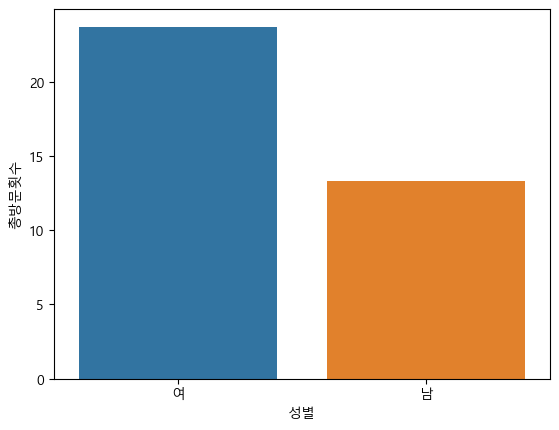

In [62]:
## 2
sns.barplot(data=df_total, x="성별", y="총방문횟수",
            estimator="mean", errorbar=None)

<Axes: xlabel='공급일자(dt)', ylabel='구매금액(clean)'>

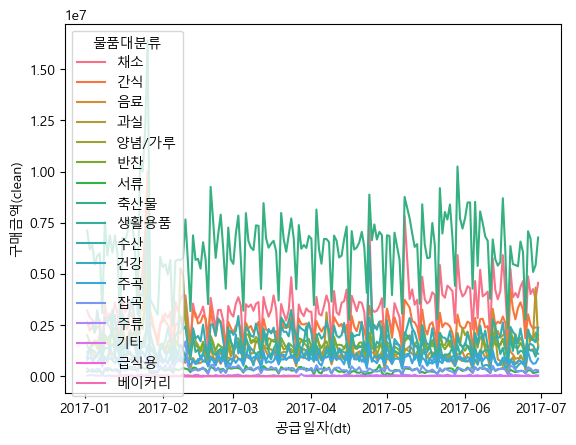

In [58]:
## 1
sns.lineplot(data=df2, x="공급일자(dt)", y="구매금액(clean)", 
             hue="물품대분류", estimator="sum", errorbar=None)